Data Analysis in R
===

# Outline


*   **Data acquisition and inspection**

*   **Preprocess the dataset**

*   **Data analysis**






##Review: working directory
*  R works best if you have a dedicated folder for each separate project - the working directory. Put all data files in the working directory (or in its sub-directories).
* The "project" in RStudio is the working directory “Pro”. If you are interested to learn more about RStudio, please visit the [Introduction to RStudio](http://www.hpc.lsu.edu/training/weekly-materials/2020-Spring/HPC_Intro_RStudio_Spring2020.pdf) tutorial from LSU HPC. 

Show current working folder:

In [272]:
getwd()

[1] "/content/data/data/data/data/data/data/data/data/data"

Let us create a new folder called "data":

In [0]:
dir.create("data")  

Go to this new folder:

In [0]:
setwd("data")

Show current working folder:

In [275]:
getwd()

[1] "/content/data/data/data/data/data/data/data/data/data/data"

##Case Study: Forbes Global 2000 list
*   The `forbes` dataset consists of 2000 rows (observations) on 8 variables describing companies’ rank, name, country, category, sales, profits, assets and market value. 
http://www.hpc.lsu.edu/training/weekly-materials/Downloads/Forbes2000.csv.zip
> * **`rank`** the ranking of the company
> * **`name`** the name of the company
> * **`country`** the country the company is situated in
> * **`category`** the products the company produces
> * **`sales`** the amount of sales of the company in billion USD
> * **`profits`** the profit of the company in billion USD
> * **`assets`** the assets of the company in billion USD
> * **`marketvalue`** the market value of the company in billion USD

*  First 10 lines of the raw data

>rank | name| country| category | sales | profits | assets | marketvalue
>--- | --- | --- | --- | --- | --- | --- | ---
>1 | Citigroup | United States | Banking | 94.71 | 17.85 | 1264.03 | 255.3
>2 | General Electric | United States | Conglomerates | 134.19 | 15.59 | 626.93 | 328.54
>3 | American Intl Group | United States | Insurance | 76.66 | 6.46 | 647.66 |194.87
>4 | ExxonMobil | United States | Oil & gas operations | 222.88 | 20.96 | 166.99 | 277.02
>5 | BP | United Kingdom | Oil & gas operations | 232.57 | 10.27 | 177.57 | 173.54
>6 | Bank of America | United States | Banking | 49.01 | 10.81 | 736.45 | 117.55
>7 | HSBC Group | United Kingdom | Banking | 44.33 | 6.66 | 757.6 | 177.96
>8 | Toyota Motor | Japan | Consumer durables | 135.82 | 7.99 | 171.71 | 115.4
>9 | Fannie Mae | United States | Diversified financials | 53.13 | 6.48 | 1019.17 | 76.84
>10 | Wal-Mart Stores | United States | Retailing | 256.33 | 9.05 | 104.91 | 243.74


# Step by step Data Analysis in R


1. Get data
2. Read data
3. Inspect data
4. Preprocess data (missing and dubious values, discard columns not needed etc.)
5. Analyze data
6. Generate report







## 1. Getting Data
* Downloading files from internet
> * Manually download the file to the working directory 
> * or with R function `download.file()`
* Unzip with the `unzip()` function

In [276]:
download.file("http://www.hpc.lsu.edu/training/weekly-materials/Downloads/Forbes2000.csv.zip","Forbes2000.csv.zip")
unzip("Forbes2000.csv.zip","Forbes2000.csv")
list.files()   # List files in current folder

[1] "Forbes2000.csv"     "Forbes2000.csv.zip"

##2. Reading data
* R understands many different data formats and has lots of ways of reading/writing them (csv, xml, excel, sql, json etc.)

>Input | Output | Purpose
>--- | --- | ---
>read.table (read.csv) | write.table (write.csv) | for reading/writing tabular data
>readLines | writeLines | for reading/writing lines of a text file
>source | dump | for reading/writing in R code files
>dget | dput | for reading/writing in R code files
>load | save | for reading in/saving workspaces

* ` read.csv()` is identical to `read.table()` except that the default separator is a comma.

In [0]:
forbes <- read.csv("Forbes2000.csv",header=T,stringsAsFactors = FALSE,na.strings ="NA",sep=",")

* **Note: Changes since R 4.0.0** 
> * R now uses a `stringsAsFactors = FALSE` default, and hence by default no longer converts strings to factors in calls to `data.frame()` and `read.table()`.
* It is a good practice to specify some options rather than using the default.

* Tips: Find out R version used on any platforms (e.g. Colab)

In [278]:
version

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          3                           
minor          6.3                         
year           2020                        
month          02                          
day            29                          
svn rev        77875                       
language       R                           
version.string R version 3.6.3 (2020-02-29)
nickname       Holding the Windsock        

###Quiz
* After importing the raw data, the R data object used for carrying the data is a:

a) vector

b) matrix

c) array

d) list

e) dataframe

##3. Inspecting data
* `class()`: check object class
* `dim()`: dimension of the data
* `head()`: print on screen the first few lines of data, may use n as argument
* `tail()`: print the last few lines of data

In [279]:
class(forbes)
dim(forbes)
head(forbes,n=50)

[1] "data.frame"

[1] 2000    8

,rank,name,country,category,sales,profits,assets,marketvalue
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54
6,6,Bank of America,United States,Banking,49.01,10.81,736.45,117.55
7,7,HSBC Group,United Kingdom,Banking,44.33,6.66,757.60,177.96
8,8,Toyota Motor,Japan,Consumer durables,135.82,7.99,171.71,115.40
9,9,Fannie Mae,United States,Diversified financials,53.13,6.48,1019.17,76.84


* `str()` (structure) displays the structure of the “forbes” dataframe.


In [280]:
str(forbes)

'data.frame':	2000 obs. of  8 variables:
 $ rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name       : chr  "Citigroup" "General Electric" "American Intl Group" "ExxonMobil" ...
 $ country    : chr  "United States" "United States" "United States" "United States" ...
 $ category   : chr  "Banking" "Conglomerates" "Insurance" "Oil & gas operations" ...
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...


* `summary()` has statistical summary of the “Forbes” dataframe. Note: there are missing values (NAs) in the profits.







In [281]:
summary(forbes)

      rank            name             country            category        
 Min.   :   1.0   Length:2000        Length:2000        Length:2000       
 1st Qu.: 500.8   Class :character   Class :character   Class :character  
 Median :1000.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1000.5                                                           
 3rd Qu.:1500.2                                                           
 Max.   :2000.0                                                           
                                                                          
     sales            profits             assets          marketvalue    
 Min.   :  0.010   Min.   :-25.8300   Min.   :   0.270   Min.   :  0.02  
 1st Qu.:  2.018   1st Qu.:  0.0800   1st Qu.:   4.025   1st Qu.:  2.72  
 Median :  4.365   Median :  0.2000   Median :   9.345   Median :  5.15  
 Mean   :  9.697   Mean   :  0.3811   Mean   :  34.042   Mean   : 11.88  
 3rd Qu.:  9.547   3rd Qu.:  0

##4. Preprocess data 


### 4.1 Preprocessing - missing values
* Missing values are denoted in R by NA or NaN for undefined mathematical operations.
> * `is.na(x)` is used to test objects "x" if there are NAs
> * Which one is NA? `which(is.na(x))`

In [0]:
# is.na(forbes$profits)  #don't run this command line because you will get a very long list

In [283]:
which(is.na(forbes$profits))
miss<-which(is.na(forbes$profits))  # save those rows with missing value

[1]  772 1085 1091 1425 1909

* more about missing value inspection
> * How many NAs? `table(is.na(x))`
> * list of observations with missing values on profits `x[is.na(x),]`



In [284]:
table(is.na(forbes$profits))
forbes[is.na(forbes$profits),]


FALSE  TRUE 
 1995     5 

,rank,name,country,category,sales,profits,assets,marketvalue
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
772,772,AMP,Australia,Insurance,5.40,NA,42.94,6.70
1085,1085,HHG,United Kingdom,Insurance,5.68,NA,51.65,2.07
1091,1091,NTL,United States,Telecommunications services,3.50,NA,10.59,5.94
1425,1425,US Airways Group,United States,Transportation,5.50,NA,8.58,0.24
1909,1909,Laidlaw International,United States,Transportation,4.48,NA,3.98,1.49


* remember many R functions also have a logical “`na.rm`” option
> * `na.rm=TRUE` means the NA values should be discarded


In [285]:
mean(forbes$profits)  # will get NA
mean(forbes$profits,na.rm=T)

[1] NA

[1] 0.3811328

* **Note: Not all missing values are marked with “NA” in the raw data!**


* The simplest way to deal with the missing values is to remove them. 
> * If a column (variable) has a high percentage of the missing value, remove the whole column or just don’t use it for the analysis.
> * If a row (observation) has a missing value, remove the row with `na.omit()`. e.g. 


In [286]:
forbes2 <- na.omit(forbes)
dim(forbes2)

[1] 1995    8

* Alternatively, the missing values can be replaced by basic statistics e.g. 
> * replace by mean 


In [287]:
for(i in 1:nrow(forbes)){
  if(is.na(forbes$profits[i])==TRUE){
  forbes$profits[i] <- mean(forbes$profits, na.rm = TRUE)
  }
}
dim(forbes)
forbes[miss,]

[1] 2000    8

,rank,name,country,category,sales,profits,assets,marketvalue
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
772,772,AMP,Australia,Insurance,5.40,0.3811328,42.94,6.70
1085,1085,HHG,United Kingdom,Insurance,5.68,0.3811328,51.65,2.07
1091,1091,NTL,United States,Telecommunications services,3.50,0.3811328,10.59,5.94
1425,1425,US Airways Group,United States,Transportation,5.50,0.3811328,8.58,0.24
1909,1909,Laidlaw International,United States,Transportation,4.48,0.3811328,3.98,1.49


* or use advanced statistical techniques. List of popular R Packages:
> * MICE
> * Amelia (named after Amelia Earhart, the first female pilot to fly solo across the Atlantic Ocean. History says, she got mysteriously disappeared (missing) while flying over the Pacific Ocean in 1937, hence this package was named to solve missing value problems.)
> * missForest (non parametric imputation method)
> * Hmisc
> * mi

###4.2 Preprocessing - subsetting data
* At most occasions we do not need all of the raw data
* There are a number of methods of extracting a subset of R objects
* Subsetting data can be done either by row or by column 


#### 4.2.1 Subsetting by row: use conditions
Find all companies with negative profit:


In [288]:
forbes[forbes$profits < 0,c("name","sales","profits","assets")]

,name,sales,profits,assets
,<chr>,<dbl>,<dbl>,<dbl>
350,Allianz Worldwide,96.88,-1.23,851.24
354,Vodafone,47.99,-15.51,256.28
364,Deutsche Telekom,56.40,-25.83,132.01
372,Credit Suisse Group,38.01,-2.40,683.44
374,France Telecom,57.99,-21.78,107.86
382,Generali Group,57.90,-0.79,239.21
396,Sumitomo Mitsui Financial,29.17,-3.94,868.42
397,E.ON,37.95,-0.73,115.57
398,Mitsubishi Tokyo Finl,20.65,-1.37,827.48


Find three companies with largest sale volumne:


In [289]:
companies <- forbes$name  # or companies <- forbes[,"name"] 
order_sales <- order(forbes$sales, decreasing=T)
#company names
companies[order_sales[1:3]]
#company sales
head(sort(forbes$sales,decreasing=T),n=3)

[1] "Wal-Mart Stores" "BP"              "ExxonMobil"

[1] 256.33 232.57 222.88

####4.2.2 Subsetting by row: use `subset()` function
Find the business category to which most of the Bermuda island companies belong.


In [290]:
Bermudacomp <- subset(forbes, country == "Bermuda")
table(Bermudacomp[,"category"]) #frequency table of categories



             Banking        Capital goods        Conglomerates 
                   1                    1                    2 
Food drink & tobacco         Food markets            Insurance 
                   1                    1                   10 
               Media Oil & gas operations  Software & services 
                   1                    2                    1 

In [291]:
Bermudacomp <- subset(forbes, country == "Spain")
table(Bermudacomp[,"category"]) #frequency table of categories


                      Banking  Business services & supplies 
                            6                             1 
                Capital goods                  Construction 
                            1                             4 
       Diversified financials          Food drink & tobacco 
                            1                             1 
Household & personal products                     Insurance 
                            1                             1 
                    Materials                         Media 
                            1                             1 
         Oil & gas operations   Telecommunications services 
                            3                             1 
               Transportation                     Utilities 
                            2                             5 

####4.2.3 Subsetting by column
Create another dataframe with only numeric variables

In [292]:
#use data.frame function
forbes3 <- data.frame(sales=forbes$sales,profits=forbes$profits,
           assets=forbes$assets, mvalue=forbes$marketvalue)
str(forbes3)

#use subset() function
forbes4 <- subset(forbes,select=c(sales,profits,assets,marketvalue))
str(forbes4)

#or simply use indexing
forbes5 <- forbes[,c(5:8)]
str(forbes5)

'data.frame':	2000 obs. of  4 variables:
 $ sales  : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits: num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets : num  1264 627 648 167 178 ...
 $ mvalue : num  255 329 195 277 174 ...
'data.frame':	2000 obs. of  4 variables:
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...
'data.frame':	2000 obs. of  4 variables:
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...


### 4.3 Preprocessing – Factors
* factors are variables in R which take on a limited number of different values; such variables are often referred to as categorical variables


Convert characters to (unordered) factors:

In [293]:
forbes$country<-factor(forbes$country)
str(forbes)

'data.frame':	2000 obs. of  8 variables:
 $ rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name       : chr  "Citigroup" "General Electric" "American Intl Group" "ExxonMobil" ...
 $ country    : Factor w/ 61 levels "Africa","Australia",..: 60 60 60 60 56 60 56 28 60 60 ...
 $ category   : chr  "Banking" "Conglomerates" "Insurance" "Oil & gas operations" ...
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...


* Small classes could be merged into a larger class. Why?
> * For better model performance. E.g. Classification and Regression Trees tend to split using the variables with many categories.
> * Actual needs: Some categories have just a few subjects

In [294]:
table(forbes$country)


                      Africa                    Australia 
                           2                           37 
   Australia/ United Kingdom                      Austria 
                           2                            8 
                     Bahamas                      Belgium 
                           1                            9 
                     Bermuda                       Brazil 
                          20                           15 
                      Canada               Cayman Islands 
                          56                            5 
                       Chile                        China 
                           4                           25 
              Czech Republic                      Denmark 
                           2                           10 
                     Finland                       France 
                          11                           63 
      France/ United Kingdom                      Germa

* Merge small classes into a larger classes

Merge all South American countries to "Venezuela"

In [0]:
forbes$country[(forbes$country=="Bahamas")|(forbes$country=="Bermuda")|(forbes$country=="Brazil")|(forbes$country=="Cayman Islands")|(forbes$country=="Chile")|(forbes$country=="Panama/ United Kingdom")|(forbes$country=="Peru")]<-"Venezuela"

Merge small classes into a larger classes

In [0]:
forbes$country[(forbes$country=="Austria")|(forbes$country=="Belgium")|(forbes$country=="Czech Republic")|(forbes$country=="Denmark")|(forbes$country=="Finland")|(forbes$country=="France")|(forbes$country=="Germany")|(forbes$country=="Greece")|(forbes$country=="Hungary")|(forbes$country=="Ireland")|(forbes$country=="Italy")|(forbes$country=="Luxembourg")|(forbes$country=="Netherlands")|(forbes$country=="Norway")|(forbes$country=="Poland")|(forbes$country=="Portugal")|(forbes$country=="Russia")|(forbes$country=="Spain")|(forbes$country=="Sweden")|(forbes$country=="Switzerland")|(forbes$country=="Turkey")|(forbes$country=="France/ United Kingdom")|(forbes$country=="United Kingdom/ Netherlands")|(forbes$country=="Netherlands/ United Kingdom")]<-"United Kingdom"
forbes$country[(forbes$country=="China")|(forbes$country=="Hong Kong/China")|(forbes$country=="Indonesia")|(forbes$country=="Japan")|(forbes$country=="Kong/China")|(forbes$country=="Korea")|(forbes$country=="Malaysia")|(forbes$country=="Philippines")|(forbes$country=="Singapore")|(forbes$country=="South Korea")|(forbes$country=="Taiwan")]<-"Thailand"
forbes$country[(forbes$country=="Africa")|(forbes$country=="Australia")|(forbes$country=="India")|(forbes$country=="Australia/ United Kingdom")|(forbes$country=="Islands")|(forbes$country=="Israel")|(forbes$country=="Jordan")|(forbes$country=="Liberia")|(forbes$country=="Mexico")|(forbes$country=="New Zealand")|(forbes$country=="Pakistan")|(forbes$country=="South Africa")|(forbes$country=="United Kingdom/ Australia")]<-"United Kingdom/ South Africa"

* Drop those levels with zero counts

Use `droplevels()` function:


In [0]:
forbes$country<-droplevels(forbes$country)

Now we can check the new frequency tables:

In [298]:
table(forbes$country)


                      Canada                     Thailand 
                          56                          499 
              United Kingdom United Kingdom/ South Africa 
                         531                          115 
               United States                    Venezuela 
                         751                           48 

* Rename each class

In [299]:
levels(forbes$country)<-c("Canada","East/Southeast Asia","Europe","Other","United States","Latin America")
levels(forbes$country)

[1] "Canada"              "East/Southeast Asia" "Europe"             
[4] "Other"               "United States"       "Latin America"

###4.4 Export the cleaned dataset (Important for the next session)
* Save forbes to Forbes2000_clean.csv

In [300]:
write.csv(forbes,"Forbes2000_clean.csv",row.names=FALSE)
list.files()

[1] "Forbes2000_clean.csv" "Forbes2000.csv"       "Forbes2000.csv.zip"

##Quiz
1. Find all German companies with negative profit


In [301]:
forbes <- read.csv("Forbes2000.csv",header=T,stringsAsFactors = FALSE,na.strings ="NA",sep=",") #reload raw data 
forbes <- na.omit(forbes)  # omit NAs
str(forbes)
tail(forbes)
# finish lines below:
#Germanycomp <- subset(    ,    )
#Germanycomp[       ,c("name","sales","profits","assets")]














'data.frame':	1995 obs. of  8 variables:
 $ rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name       : chr  "Citigroup" "General Electric" "American Intl Group" "ExxonMobil" ...
 $ country    : chr  "United States" "United States" "United States" "United States" ...
 $ category   : chr  "Banking" "Conglomerates" "Insurance" "Oil & gas operations" ...
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...
 - attr(*, "na.action")= 'omit' Named int  772 1085 1091 1425 1909
  ..- attr(*, "names")= chr  "772" "1085" "1091" "1425" ...


,rank,name,country,category,sales,profits,assets,marketvalue
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1995,1995,AMEC,United Kingdom,Construction,5.17,0.02,2.62,1.53
1996,1996,Siam City Bank,Thailand,Banking,0.48,0.02,11.27,1.47
1997,1997,Yokogawa Electric,Japan,Business services & supplies,2.78,-0.22,2.96,3.29
1998,1998,Hindalco Industries,India,Materials,1.35,0.14,2.47,2.76
1999,1999,Nexans,France,Capital goods,5.09,0.00,2.71,0.88
2000,2000,Oriental Bank of Commerce,India,Banking,0.81,0.10,7.16,1.17


In [303]:
forbes <- read.csv("Forbes2000.csv",header=T,stringsAsFactors = FALSE,na.strings ="NA",sep=",") #reload raw data 
forbes <- na.omit(forbes)  # omit NAs
# finish lines below:
forbes$country[(forbes$country=="Netherlands")]
#Netherlandscomp <- subset(    ,    )
#Netherlandscomp[       ,c("name","sales","profits","assets")]

[1] "Netherlands" "Netherlands" "Netherlands" "Netherlands" "Netherlands"
 [6] "Netherlands" "Netherlands" "Netherlands" "Netherlands" "Netherlands"
[11] "Netherlands" "Netherlands" "Netherlands" "Netherlands" "Netherlands"
[16] "Netherlands" "Netherlands" "Netherlands" "Netherlands" "Netherlands"
[21] "Netherlands" "Netherlands" "Netherlands" "Netherlands" "Netherlands"
[26] "Netherlands" "Netherlands" "Netherlands"

2. Arbitrarily merge the classes of category to three classes: industry, services and finance

In [304]:
# factorize the values in the "category" 
forbes$category=factor(forbes$category)
str(forbes)
table(forbes$category)


'data.frame':	1995 obs. of  8 variables:
 $ rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name       : chr  "Citigroup" "General Electric" "American Intl Group" "ExxonMobil" ...
 $ country    : chr  "United States" "United States" "United States" "United States" ...
 $ category   : Factor w/ 27 levels "Aerospace & defense",..: 2 6 16 19 19 2 2 8 9 20 ...
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...
 - attr(*, "na.action")= 'omit' Named int  772 1085 1091 1425 1909
  ..- attr(*, "names")= chr  "772" "1085" "1091" "1425" ...



             Aerospace & defense                          Banking 
                              19                              313 
    Business services & supplies                    Capital goods 
                              70                               53 
                       Chemicals                    Conglomerates 
                              50                               31 
                    Construction                Consumer durables 
                              79                               74 
          Diversified financials            Drugs & biotechnology 
                             158                               45 
            Food drink & tobacco                     Food markets 
                              83                               33 
Health care equipment & services     Hotels restaurants & leisure 
                              65                               37 
   Household & personal products                        Insur

In [305]:
# arbitrarily define "Industry"
forbes$category[(forbes$category=="Aerospace & defense")|(forbes$category=="Chemicals")|(forbes$category=="Conglomerates")|(forbes$category=="Construction")|(forbes$category=="Consumer durables")|(forbes$category=="Drugs & biotechnology")|(forbes$category=="Food markets")|(forbes$category=="Food drink & tobacco")|(forbes$category=="Food markets")|(forbes$category=="Household & personal products")|(forbes$category=="Materials")|(forbes$category=="Semiconductors")|(forbes$category=="Technology hardware & equipment")|(forbes$category=="Utilities")]<-"Industry"
# arbitrarily define "Cervices" and "Finance"
# finish lines below
#forbes$category[    ]<-"Services"
#forbes$category[    ]<-"Finance"
# drop levels with 0 count
#forbes$category<-droplevels()
table(forbes$category)

Warning message in `[<-.factor`(`*tmp*`, (forbes$category == "Aerospace & defense") | :
“invalid factor level, NA generated”



             Aerospace & defense                          Banking 
                               0                              313 
    Business services & supplies                    Capital goods 
                              70                               53 
                       Chemicals                    Conglomerates 
                               0                                0 
                    Construction                Consumer durables 
                               0                                0 
          Diversified financials            Drugs & biotechnology 
                             158                                0 
            Food drink & tobacco                     Food markets 
                               0                                0 
Health care equipment & services     Hotels restaurants & leisure 
                              65                               37 
   Household & personal products                        Insur

##Solution 
1. Find all German companies with negative profit


In [306]:
forbes <- read.csv("Forbes2000.csv",header=T,stringsAsFactors = FALSE,na.strings ="NA",sep=",") #reload raw data 
forbes <- na.omit(forbes)  # omit NAs
Germanycomp <- subset(forbes, country == "Germany")
Germanycomp[Germanycomp$profits < 0,c("name","sales","profits","assets")]

,name,sales,profits,assets
,<chr>,<dbl>,<dbl>,<dbl>
350,Allianz Worldwide,96.88,-1.23,851.24
364,Deutsche Telekom,56.40,-25.83,132.01
397,E.ON,37.95,-0.73,115.57
431,HVB-HypoVereinsbank,40.52,-0.87,705.36
500,Commerzbank,22.43,-0.31,437.86
798,Infineon Technologies,7.18,-0.51,11.79
869,BHW Holding,7.46,-0.38,117.96
926,Bankgesellschaft Berlin,9.43,-0.74,182.69
1034,W&W-Wustenrot,7.57,-0.08,56.44


## 5. Data analysis


###5.1 Two common questions:
* Which statistical model should I use for my data analysis?
* How to choose the right R packages for my data analysis?


#### Which statistical model should I use for my data analysis?
* This is not a statistics workshop…
* If you need to learn more about the data mining and data analysis, collaborate with statisticians on your campus
> * e.g.: LSU https://www.lsu.edu/agriculture/exst/consulting.php
* Coursera or any open courses provided by your institution


####How to choose the right R packages for my data analysis?
* The most popular packages are most frequently mentioned
* CRAN task views 
https://cran.r-project.org/web/views/
* RDocumentation https://www.rdocumentation.org
> *  a website, an R package and an API
> * supports taskview 
> * searchs all 19,766 CRAN, Bioconductor and GitHub packages




###5.2 Import the cleaned dataset (Optional)
* Subsetting by column
Create a dataframe with the clean data

In [307]:
forbes_clean <- read.csv("Forbes2000_clean.csv",header=T,stringsAsFactors = T,na.strings ="NA",sep=",")
str(forbes_clean)

'data.frame':	2000 obs. of  8 variables:
 $ rank       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ name       : Factor w/ 2000 levels "Aareal Bank",..: 438 747 100 659 311 219 870 1827 663 1921 ...
 $ country    : Factor w/ 6 levels "Canada","East/Southeast Asia",..: 6 6 6 6 3 6 3 2 6 6 ...
 $ category   : Factor w/ 27 levels "Aerospace & defense",..: 2 6 16 19 19 2 2 8 9 20 ...
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...


###5.3 Extract Variables 
* Create another data frame with only numeric variables + country

In [308]:
forbes_clean <- forbes_clean[,c(3, 5:8)]
str(forbes_clean)

'data.frame':	2000 obs. of  5 variables:
 $ country    : Factor w/ 6 levels "Canada","East/Southeast Asia",..: 6 6 6 6 3 6 3 2 6 6 ...
 $ sales      : num  94.7 134.2 76.7 222.9 232.6 ...
 $ profits    : num  17.85 15.59 6.46 20.96 10.27 ...
 $ assets     : num  1264 627 648 167 178 ...
 $ marketvalue: num  255 329 195 277 174 ...


###5.4 Training Set and Test Set
* Dataset could be randomly split into two parts: training set and test set. 


In [0]:
set.seed(1) #set random seed reproducible
indx <- sample(1:1995,size=1995,replace=F)
forbes.train <- forbes_clean[indx[1:1600],]
forbes.test <- forbes_clean[indx[1601:1995],]

###5.5 Roadmap of generalizations of linear models
* Roadmap of generalizations of linear models:
> https://drive.google.com/open?id=1HrnpinlmyZl9_GL9xX24a5Nv6PUumovI


* Explanation of Acronyms

>Models | Acronym | R function
>--- | --- | ---
>Linear Models | LM | lm, aov
>MultivariateLMs | MLM | manova
>Generalized LMs | GLM | glm
>Linear Mixed Models | LMM | lme, aov
>Non-linear Models | NLM | nls
>Non-linear Mixed Models | NLMM | nlme
>Generalized LMMs | GLMM | glmmPQL
>Generalized Additive Models | GAM | gam


* Symbol Meanings in Model Formulae

>Symbol | Example | Meaning
>--- | --- | ---
>+ | +X | Include variable X in the model
>- | -X | Exclude variable X in the model
>: | X:Z | Include the interaction between X and Z
>\* | X\*Z | Include X and Z and the interactions
>\| | NLM | Conditioning: include X given Z
>^ | NLMM | Include A, B and C and all the interactions up to three way
>/ | GLMM | As is: include a new variable consisting of these variables multiplied




* Model Formulae
> * General form: response ~ term1 + term2

> Example | Meaning
>--- | --- 
>y ~ x | Simple regression
>y ~ -1 +  x | LM through the origin
>y ~ x + x^2 | Quadratic regression
>y ~ x1 + x2 + x3 | Multiple regression
>y ~ . | All variables included
>y ~ . - x1 | All variables except X1
>y ~ A + B + A : B | Add interaction
>y ~ A \* B | Same above
>y ~ (A+B)^2 | Same above






###5.6 A Multiple linear regression example
* marketvalue ~ profits + sales + assets + country


In [310]:
lm <- lm(marketvalue ~ ., data = forbes.train)
summary(lm)



Call:
lm(formula = marketvalue ~ ., data = forbes.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-109.666   -4.618   -2.117    1.117  226.051 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 3.02902    2.39104   1.267    0.205    
countryEast/Southeast Asia -2.20531    2.51719  -0.876    0.381    
countryEurope               0.73119    2.51171   0.291    0.771    
countryLatin America       -0.92692    3.60454  -0.257    0.797    
countryOther               -0.25341    2.88937  -0.088    0.930    
countryUnited States        2.55092    2.47472   1.031    0.303    
sales                       0.51882    0.02757  18.816   <2e-16 ***
profits                     3.78706    0.24812  15.263   <2e-16 ***
assets                      0.04631    0.00432  10.720   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.99 on 1591 degrees of freedom
Multiple R-square

* R has created a n-1 variables each with two levels. These n-1 new variables contain the same information as the single variable. This recoding creates a table called contrast matrix.


In [311]:
contrasts(forbes.train$country)


,East/Southeast Asia,Europe,Latin America,Other,United States
Canada,0,0,0,0,0
East/Southeast Asia,1,0,0,0,0
Europe,0,1,0,0,0
Latin America,0,0,1,0,0
Other,0,0,0,1,0
United States,0,0,0,0,1


* The decision to code dummy variables is arbitrary, and has no effect on the regression computation, but does alter the interpretation of the coefficients.


###5.7 A Stepwise regression example
* The function `regsubsets()` in the leaps library allow us to do the stepwise regression


In [312]:
install.packages("leaps")
library(leaps)
bwd <- regsubsets(marketvalue ~ ., data = forbes.train,nvmax =3,method ="backward")
summary(bwd)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Subset selection object
Call: regsubsets.formula(marketvalue ~ ., data = forbes.train, nvmax = 3, 
    method = "backward")
8 Variables  (and intercept)
                           Forced in Forced out
countryEast/Southeast Asia     FALSE      FALSE
countryEurope                  FALSE      FALSE
countryLatin America           FALSE      FALSE
countryOther                   FALSE      FALSE
countryUnited States           FALSE      FALSE
sales                          FALSE      FALSE
profits                        FALSE      FALSE
assets                         FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: backward
         countryEast/Southeast Asia countryEurope countryLatin America
1  ( 1 ) " "                        " "           " "                 
2  ( 1 ) " "                        " "           " "                 
3  ( 1 ) " "                        " "           " "                 
         countryOther countryUnited States sales profits assets
1  ( 1

An asterisk indicates that a given variable is included in the corresponding model.


###5.8 A Regression tree example
* The function `rpart() `in the rpart library allow us to grow a regression tree


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



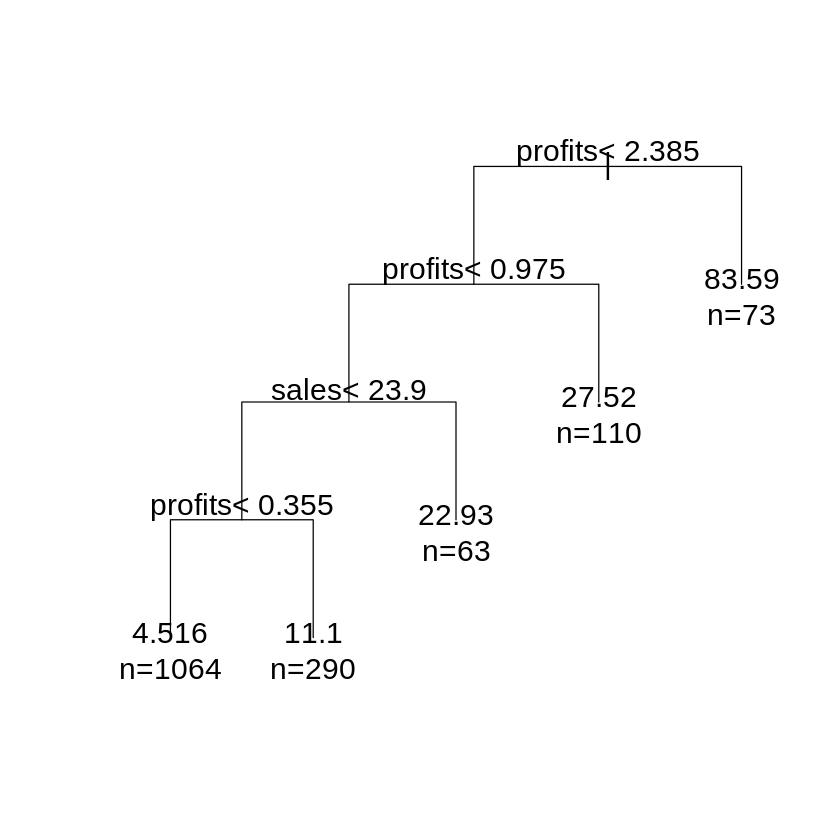

In [313]:
install.packages("rpart")
library(rpart)
rpart <- rpart(marketvalue ~ ., data = forbes.train,control = rpart.control(xval = 10, minbucket = 50))
par(mfrow=c(1,1),xpd=NA,cex=1.5)
plot(rpart,uniform=T)
text(rpart,use.n=T)


###5.9 A Bagging tree example
* The function `randomForest()` in the randomForest library allow us to grow a regression tree


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,%IncMSE,IncNodePurity
country,6.013433,25356.54
sales,21.674265,169834.01
profits,35.134534,345812.73
assets,13.893667,130742.23


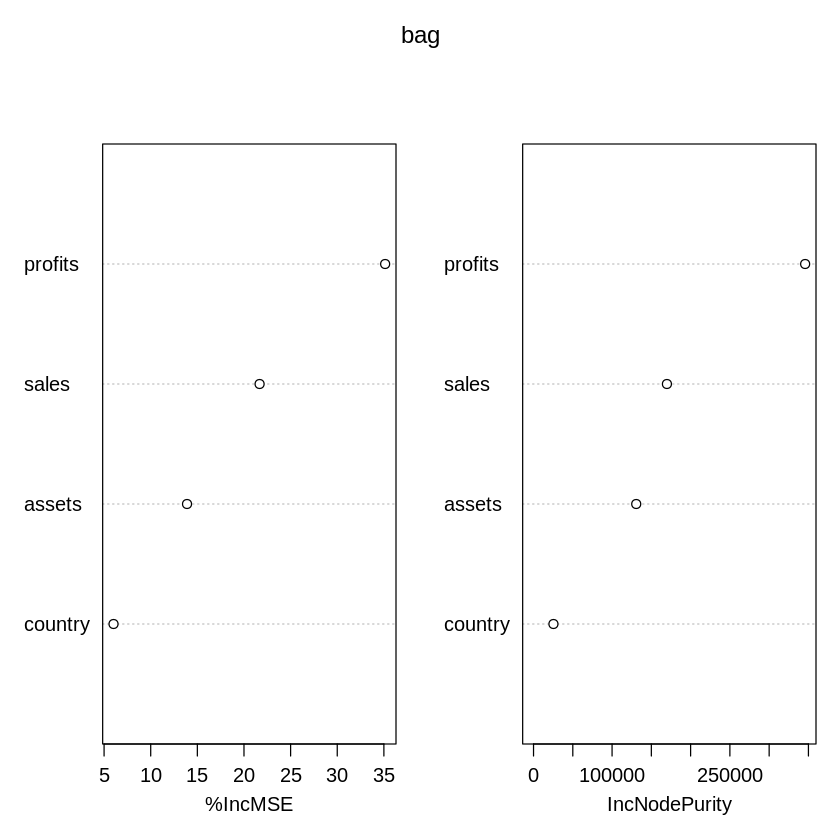

In [314]:
install.packages("randomForest")
library(randomForest)
bag <- randomForest(marketvalue ~ ., data = forbes.train, importance =TRUE)
importance(bag)
varImpPlot(bag)

### 5.10 The predictive results in terms of the MAD and RMSE values 
* MAD:

$MAD = \frac{1}{N}\times\sum_{i=1}^N|y_i-\hat{y_i}|$


* RMSE:

$RMSE = \sqrt{\sum_{i=1}^N(y_i-\hat{y_i})^2/N}$

>Model | Package | RMSE | MAD
>--- | --- | --- | ---
>MLR |  | 14.41041 | 6.436288
>Backward | leaps | 14.41041 | 6.436288
>Pruned tree | rpart | 17.85625 | 5.899107
>Bagging tree | randomForest | 11.69301 | 4.944942

* Bagging tree example for calculating RMSE and MAD

In [315]:
forbes_clean2 <- forbes_clean[,c(2:5)]  # create a new dataframe with only numeric variables included
set.seed(2) 
indx <- sample(1:1995,size=1995,replace=F)
forbes.train <- forbes_clean2[indx[1:1600],]
forbes.test <- forbes_clean2[indx[1601:1995],]
bag <- randomForest(marketvalue ~ ., data = forbes.train, importance =TRUE)
# RMSE and MAD 
bag.yhat <- predict(bag, newdata = forbes.test) 
bag.y <- forbes.test["marketvalue"] 
bag.rmse <- sqrt(mean(data.matrix((bag.y - bag.yhat)^2)))
bag.rmse
bag.abs = abs(bag.y - bag.yhat) 
bag.mad = (sum(bag.abs))/395 
bag.mad 

[1] 14.77049

[1] 4.846011

##Quiz
1. Use the `lm()` function to perform a multiple linear regression with profits as the response and all other numeric variables as the predictors. Use the `summary()` function to print the results. 


In [271]:
forbes_clean2 <- forbes_clean[,c(2:5)]  # create a new dataframe with only numeric variables included
set.seed(3) 
indx <- sample(1:1995,size=1995,replace=F)
forbes.train <- forbes_clean2[indx[1:1600],]
forbes.test <- forbes_clean2[indx[1601:1995],]
str(forbes.train)

'data.frame':	1600 obs. of  4 variables:
 $ sales      : num  2.86 4.72 9.91 1.16 3.95 ...
 $ profits    : num  0.5 0.05 -1.8 0.25 0.79 0.33 0.21 0.37 0.23 0.3 ...
 $ assets     : num  7.33 4.71 27.76 8.86 7.72 ...
 $ marketvalue: num  6.45 1.42 11.46 6.52 13.98 ...


In [0]:
#finish lines below
#lm <- lm(   profits ~ , data=forbes.train     )
#summary(lm)

2. Comment on the output. For instance:  Is there a relationship between the predictors and the response? 


3. Which predictors appear to have a statistically significant relationship to the response? 


4. What does the coefficient for the sales variable suggest?


##Solution 2
1. Use the `lm()` function to perform a multiple linear regression with profits as the response and all other numeric variables as the predictors. Use the `summary()` function to print the results. 


In [0]:
lm <- lm(profits ~ ., data = forbes.train)
summary(lm)


Call:
lm(formula = profits ~ ., data = forbes.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-29.2532  -0.0266   0.1169   0.2190   9.1538 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1211415  0.0439806  -2.754  0.00595 ** 
sales        0.0115652  0.0027422   4.217 2.61e-05 ***
assets      -0.0012144  0.0004237  -2.866  0.00421 ** 
marketvalue  0.0362598  0.0019938  18.186  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.537 on 1596 degrees of freedom
Multiple R-squared:  0.3164,	Adjusted R-squared:  0.3151 
F-statistic: 246.3 on 3 and 1596 DF,  p-value: < 2.2e-16


##6. Generate report with R Markdown
### 6.1 How R Markdown works
* Weaves R code and human readable texts together into a plain text file that has the extension `.Rmd`
* The `rmarkdown` package can convert `.Rmd` into documents of two types of output formats: documents, and presentations. All available formats are listed below:
> * beamer_presentation
> * context_document
> * github_document
> * html_document
> * ioslides_presentation
> * latex_document
> * md_document
> * odt_document
> * pdf_document
> * powerpoint_presentation
> * rtf_document
> * slidy_presentation
> * word_document

* Also helps make your research reproducible



### 6.2 How `.Rmd` file looks like
[A typical R Markdown file](https://drive.google.com/file/d/1jqdwhcAM8OHLx2TGR8UAZZGttN7yty2N/view?usp=sharing)

The file above contains three types of content:
* An (optional) YAML header surrounded by ---s
* R code chunks surrounded by ```s
* text mixed with simple text formatting


### 6.3 Installation
* R Markdown is free and open source.

In [0]:
install.packages("rmarkdown")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### 6.4 Convert today's training material to `.Rmd`


**Conversion script below is developed by JJ Allaire, Yihui Xie, Jonathan McPherson, Javier Luraschi, Kevin Ushey, Aron Atkins, Hadley Wickham, Joe Cheng, Winston Chang, Richard Iannone.
https://github.com/rstudio/rmarkdown/blob/master/R/jupyter.R**

In [0]:
getwd()
# Download conversion script
download.file("https://raw.githubusercontent.com/rstudio/rmarkdown/master/R/jupyter.R","jupyter.R")
# Download today's training material
download.file("https://raw.githubusercontent.com/lsuhpchelp/lbrnloniworkshop2020/master/day4/data_R.ipynb","data_R.ipynb")
list.files()
source("jupyter.R")
convert_ipynb("data_R.ipynb",output = xfun::with_ext("data_R.ipynb", "Rmd"))
list.files()

[1] "/content/data"

[1] "data_R.ipynb"         "Forbes2000_clean.csv" "Forbes2000.csv"      
[4] "Forbes2000.csv.zip"   "jupyter.R"

[1] "data_R.ipynb"         "data_R.Rmd"           "Forbes2000_clean.csv"
[4] "Forbes2000.csv"       "Forbes2000.csv.zip"   "jupyter.R"

### 6.5 Render `.Rmd` file
Note: If you do not select a format, R Markdown renders the file to its default format, which you can set in the output field of a .Rmd file’s header.

"Let's render this new `data_R.Rmd` file in the Google Colab!"

Colab: "Excuse me??"

## Quiz
Why can't we render this new `.Rmd` file directly in the Colab? e.g.: 

render("data_R.Rmd", output_format = "html_document")

###6.6 Cheatsheet and reference guide
* [Cheatsheet](https://rstudio.com/wp-content/uploads/2016/03/rmarkdown-cheatsheet-2.0.pdf)
* [Reference guide](https://rstudio.com/wp-content/uploads/2015/03/rmarkdown-reference.pdf)

#Take-home message
* Get the data 
* Read and inspect the data
* Preprocess the data
> *  missing values, discard rows, columns not needed etc.
* Analyze the data
> * choose the right model and R package
> * common R functions and syntax for regressions
* Generate the report
> * R Markdown basics


# Getting Help
* Documentation: http://www.hpc.lsu.edu/docs
* Contact us
> * Email ticket system: sys-help@loni.org
> * Telephone Help Desk: 225-578-0900